<a href="https://colab.research.google.com/github/ayushNautiyal35/ML_basic_to_advanced/blob/main/Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Training Models***

---



#1. Linear Regression

 A linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term.

y = θ0+ θ1x1+ θ2x2+ ⋯ + θnxn

• ŷ is the predicted value.

• n is number of features.

• xi is the ith feature value.

• θj is the j model parameters includeing the bias term θ0 and feature weights θ1,θ2,...θm.

This can be written as :

y = hθ(x) = θ · x

where ,

• θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.

• x is the instance’s feature vector, containing x0
 to xn
, with x0
 always equal to 1.


• θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0+ θ1x1+ θ2x2+ ⋯ + θnxn.


• hθ is the hypothesis function, using the model parameters θ.




To train a linear regression model we need to find the value of  θ that minimizes the value of RMSE.
For that we have two method:


1.closed form equation.

2. Gradient Descent.

 **The Normal Equation**

To find the value of  θ that minimizes the MSE,there exist a closed-form solution- i n other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

θ^ = ((X^T)X)^−1 X^T y

• θ^ is the value of θ that minimizes the cost function.


• y is the vector of target values containing y^(1) to y^(m).

In [75]:
import numpy as np
np.random.seed(42)
m=100
x=2*np.random.rand(m,1)
y=4+3*x+np.random.rand(m,1)
y

array([[ 6.2786699 ],
       [10.34069625],
       [ 8.70631963],
       [ 8.1005216 ],
       [ 5.84367832],
       [ 5.18525935],
       [ 4.7588846 ],
       [ 9.95260801],
       [ 7.83548824],
       [ 8.32541538],
       [ 4.41325842],
       [ 9.9806804 ],
       [ 9.9243535 ],
       [ 6.08215504],
       [ 5.72435356],
       [ 5.97188765],
       [ 6.62912553],
       [ 7.33510865],
       [ 7.48422911],
       [ 6.28671708],
       [ 8.47855752],
       [ 5.73305446],
       [ 6.07087137],
       [ 6.30822298],
       [ 6.96435507],
       [ 9.13816356],
       [ 6.01605746],
       [ 7.94613721],
       [ 7.56143954],
       [ 4.78944978],
       [ 8.06268011],
       [ 5.24525255],
       [ 4.51017493],
       [10.03092839],
       [10.7367019 ],
       [ 9.17358702],
       [ 6.34647324],
       [ 5.28905164],
       [ 8.46902776],
       [ 7.61269705],
       [ 5.6946767 ],
       [ 7.22284376],
       [ 4.70357963],
       [ 9.75680072],
       [ 5.83752038],
       [ 8

Now lets compute θ^  using normal equation. we will use inv() function from Numpy linear algebra module (np.linalg) to compute the inverse of a matrix and the dot() method for matrix multiplication.@ operator performs multplication.

In [76]:
from sklearn.preprocessing import add_dummy_feature
x_b=add_dummy_feature(x) #add x0=1 to each instance
theta_best=np.linalg.inv(x_b.T @ x_b)@x_b.T @y

In [77]:
theta_best

array([[4.51359766],
       [2.98323418]])

The fnction we used to calculate y=4+3x1+Gaussian Noise.

We hope for θ0=4 and θ1=3 instead of what we get 4.51 and 2.98.
It is due to gaussian noise.


In [78]:
x_new=np.array([[0],[2]])
x_new_b= add_dummy_feature(x_new)
y_predict=x_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

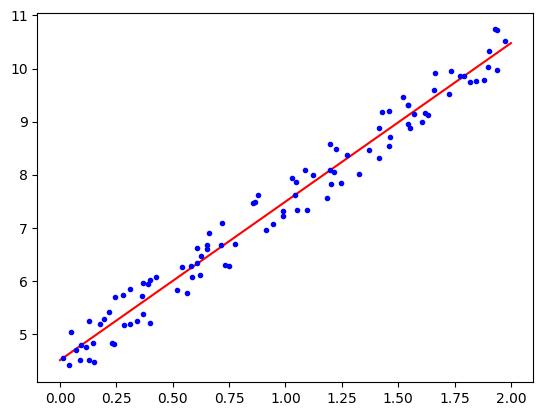

In [79]:
import matplotlib.pyplot as plt
plt.plot(x_new,y_predict,"r-",label="Predictions")
plt.plot(x,y,"b.")
plt.show()

Performing linear regression using scikit learn is relatively straight forward

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.51359766]), array([[2.98323418]]))

In [82]:
lin_reg.predict(x_new)

array([[ 4.51359766],
       [10.48006601]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly

In [83]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes θ = X
+
y, where X+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:


In [84]:
np.linalg.pinv(x_b)@y

array([[4.51359766],
       [2.98323418]])

The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ VT
(see
numpy.linalg.svd()). The pseudoinverse is computed as X
+
= VΣ+U
T
. To compute
the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the non-zero values with their inverse, and finally
it transposes the resulting matrix. This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.


**Computational Complexity**

The Normal Equation computes the inverse of XT X, which is an (n + 1) × (n + 1)
matrix (where n is the number of features). The computational complexity of inverting
such a matrix is typically about O(n^
2.4) to O(n^
3
) (depending on the implementation).

The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n
2
). If
you double the number of features, you multiply the computation time by roughly 4.

Also, once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity
is linear with regards to both the number of instances you want to make predictions
on and the number of features.

**Gradient Descent**

Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

 it measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient. Once the gra‐
dient is zero, you have reached a minimum

Concretely, you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution

Fortunately, the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.4
 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if
the features have very different scales

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

Training a model means searching for a
combination of model parameters that minimizes a cost function (over the training
set). It is a search in the model’s parameter space: the more parameters a model has,
the more dimensions this space has, and the harder the search is.

**Batch Gradient Descent**

To implement Gradient Descent, you need to compute the gradient of the cost func‐
tion with regards to each model parameter θj
. In other words, you need to calculate
how much the cost function will change if you change θj
just a little bit. This is called
a partial derivative

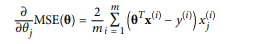

Partial derivative of cost function.



In [85]:
eta=0.1
n_epochs=1000
m=len(x_b)
np.random.seed(42)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
  gradients=2/m * x_b.T@(x_b @theta -y)
  theta= theta-eta*gradients

In [86]:
theta

array([[4.51359766],
       [2.98323418]])

Each iteration over the training set is called an epoch.

You may wonder how to set the number of iterations?


A simple solution is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

Convergence Rate:

When the cost function is convex and its slope does not change abruptly (as is the
case for the MSE cost function), Batch Gradient Descent with a fixed learning rate
will eventually converge to the optimal solution, but you may have to wait a while: it
can take O(1/ϵ) iterations to reach the optimum within a range of ϵ depending on the
shape of the cost function. If you divide the tolerance by 10 to have a more precise
solution, then the algorithm may have to run about 10 times longer.


**Stochastic Gradient Descent**

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

When the cost function is very irregular, this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired from the process of annealing in metallurgy where molten
metal is slowly cooled down. The function that determines the learning rate at each
iteration is called the learning schedule. If the learning rate is reduced too quickly, you
may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum for a
long time and end up with a suboptimal solution if you halt training too early.


In [87]:
import numpy as np
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=x_b[random_index:random_index+1]
    yi=y[random_index : random_index+1]
    gradients=2*xi.T @ (xi@theta-yi)
    eta= learning_schedule(epoch*m +iteration)
    theta=theta-eta*gradients

While the batch gradient descent code iterated 1000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution

In [88]:
theta

array([[4.51548062],
       [2.9775157 ]])

 since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set (making sure to shuffle the input features and the labels jointly), then
go through it instance by instance, then shuffle it again, and so on.

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function.

In [89]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(x,y.ravel()) #y.ravel() beacuse fit() excepts 1D targets
sgd_reg.intercept_,sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

**Mini-Batch Gradient Descent**

p, instead of computing the gradients based on the full train‐
ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.


The algorithm’s progress in parameter space is less erratic than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima

Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.


**Polynomial Regression**

you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.




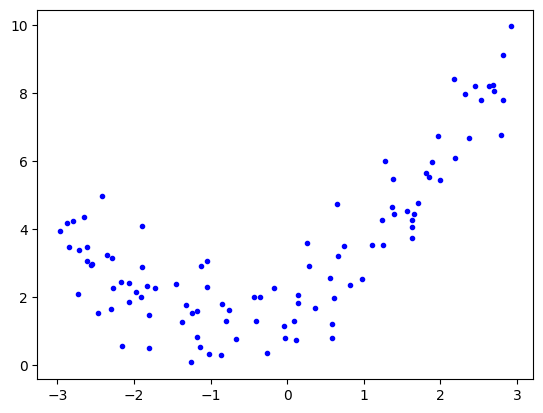

In [90]:
np.random.seed(42)
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2 +x+2+np.random.randn(m,1)
plt.plot(x,y,"b.")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features.

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [92]:
x_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data.

In [93]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree.

**Learning Curves**

Scikit-Learn has a useful learning_curve() function to help with this: it trains and evaluates the model using cross-validation.
By default it retains the model on growing subsets of the training set,but if the model supports incremental learning you can set exploit_incremental_learning=True when calling learning_curve() and it will train the model incrementally instead.
The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured for each size and for each cross-validation fold.

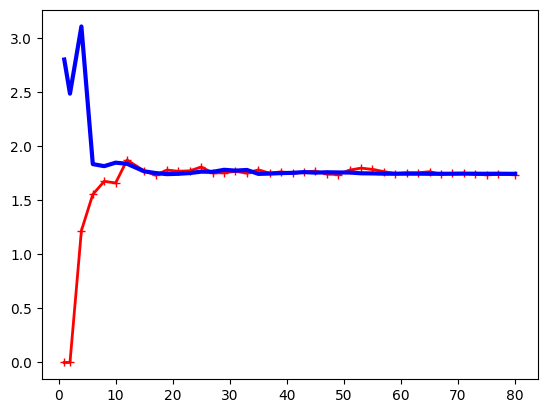

In [94]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,valid_scores=learning_curve(
    LinearRegression(),x,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error")
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")
plt.show()

This model is underfitting. When there are just one or two instances in the training set, the model can fit them perfectly. But as new instances are added it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all.

If we talk about validation error when the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite large.Then as the model is shown more training examples, it learns, and thus the validation error slowly goes down.

Now lets look at the learning curves of a 10th degree polynomial model on the same data.

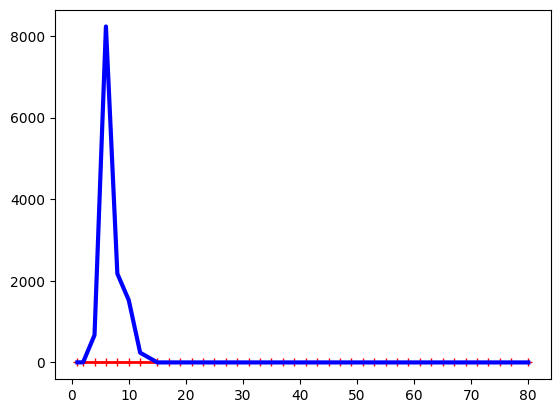

In [95]:
from sklearn.pipeline import make_pipeline
polynomial_regression=make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False), LinearRegression()
)
train_sizes,train_scores,valid_scores=learning_curve(
    polynomial_regression,x,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error"
)
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)
plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")
plt.show()

These learning curves look a bit like the previous ones, but there are two very important differences:
• The error on the training data is much lower than with the Linear Regression
model.
• There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer.

**Regularized Linear Models**

A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. For a linear model, regularization is typically achieved by constraining the weights of the model.

There are 3 ways of constraining the weights:


i. Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to
 image.png
is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

image.png
Ridge regression cost function


For Gradient Descent, just add αw to the MSE gradient vector.


As with Linear Regression, we can perform Ridge Regression either by computing a
closed-form equation or by performing Gradient Descent. The pros and cons are the
same.

image.png

Ridge regression closed-form solution

In [96]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

And using SGD:

In [97]:
sgd_reg=SGDRegressor(penalty="l2",alpha=0.1/m, tol=None,max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

ii. Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm.

 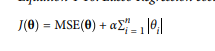

 Lasso regression cost function

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). For example,
the dashed line in the right plot on (with α = 10-7) looks quadratic, almost
linear: all the weights for the high-degree polynomial features are equal to zero. In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

The gradient get smaller as the parameters approach the gloabal optimum,so gradietn descent naturally slows don. This limits the bouncing around,which helps ridge  converges faster than lasso regression.



In [98]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

iii. Elastic Net Regression

It is a middle ground between ridge regression and lasso regression. The regularization term is aweighted sum of both ridge and lasso's regularization terms, and you can control the mix ration r.When r=0, elastic net is equivalent to ridge regression and when r=1, it is equivalent to lasso regression.

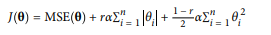

Elastic net cost function

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features weights down to
zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.


In [99]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([4.78114505])

**Early Stopping**

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.

As the
epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set. However after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is
such a simple and efficient regularization technique that Geoffrey Hinton called it a
“beautiful free lunch.”


#**2.Logistic Regression**

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

 Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result.

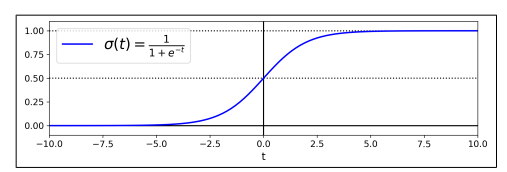

Logistic function

The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y =
1) and low probabilities for negative instances (y = 0). This idea is captured by the
cost function.

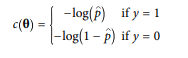

Cost function of as single training instance.



Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

In [100]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [101]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [103]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x=iris.data[['petal width (cm)']].values
y=iris.target_names[iris.target]=='virginica'
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

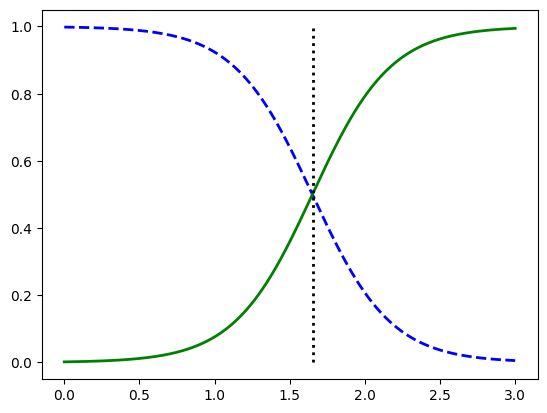

In [105]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_probab=log_reg.predict_proba(x_new)
decision_boundary=x_new[y_probab[:,1]>=0.5][0,0]

plt.plot(x_new,y_probab[:,0],"b--",linewidth=2,label='Not Iris Virginica Proba')
plt.plot(x_new,y_probab[:,1],"g-",linewidth=2,label="Iris Virginica Proba")
plt.plot([decision_boundary,decision_boundary],[0,1],"k:",linewidth=2,label='Decision Boundary')
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an IrisVirginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an IrisVirginica, or else it will predict that it is not (even if it is not very confident):

In [106]:
decision_boundary

1.6516516516516517

In [107]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

**Softmax Regression**

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers . This is called Softmax Regression, or Multinomial Logistic Regression.
The idea is quite simple: when given an instance x, the Softmax Regression model
first computes a score sk
(x) for each class k, then estimates the probability of each
class by applying the somax function (also called the normalized exponential) to the
scores.

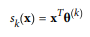

Softmax score for class k.

Note that each class has its own dedicated parameter vector θ
(k). All these vectors are
typically stored as rows in a parameter matrix Θ.


let’s take a look at training. The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes). Minimizing the cost function, called the cross
entropy, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

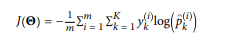

Cross Entropy cost function

In [108]:
x=iris.data[['petal length (cm)','petal width (cm)']].values
y=iris['target']
x_trai,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

softmax_reg=LogisticRegression(C=30,random_state=42)
softmax_reg.fit(x_train,y_train)

LogisticRegression(C=30, random_state=42)

In [109]:
 softmax_reg.predict([[5]])

array([2])

In [110]:
softmax_reg.predict_proba([[5]]).round(2)

array([[0., 0., 1.]])

#**3.Support Vector Machine**

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

**Linear SVM Classification**

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification.

Notice that adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge of the street. These instances are called the support vectors.

**Soft Margin Classification**

If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable, and second it is quite sensitive to outliers.

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification.

In Scikit-Learn SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations.

The following Scikit-Learn code loads the iris dataset, scales the features, and then
trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss
function, described shortly) to detect Iris-Virginica flowers.




In [111]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=load_iris(as_frame=True)
x=iris.data[["petal length (cm)","petal width (cm)"]].values
y=(iris.target==2)

svm_clf= make_pipeline(StandardScaler(),LinearSVC(C=1,random_state=42))

svm_clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [112]:
x_new=[[5.5,1.7],[5.0,1.5]]
svm_clf.predict(x_new)

array([ True, False])

In [113]:
svm_clf.decision_function(x_new)

array([ 0.66163411, -0.22036063])

Unlike logistic regression linearSVC doesnt have predict_proba() method to estime the calss probablities.That said,if you use the SVC class instead of LinearSVC and if you set its probablity hyperparameter to True,then the model will fit an extra model at the end of training to map the SVM decision function scores to estimated probablities. under the hood it requires using 5fold cross validation scores to generate out of sample predictions for every instance in the training set, then training a LogisticRegression model,so it will slow down training considerably.

**Nonlinear SVM Classification**

Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

To implement this idea using Scikit-Learn, you can create a Pipeline containing a
PolynomialFeatures transformer followed by a StandardScaler and a LinearSVC. Lets test this on the moons
dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles


In [114]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
x,y=make_moons(n_samples=100,noise=0.15,random_state=42)
polynomial_svm_clf=make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10,max_iter=10_000,random_state=42)
)
polynomial_svm_clf.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

**Polynomial kernel**

Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.

when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you dont actually add any features. This
trick is implemented by the SVC class.

In [115]:
from sklearn.svm import SVC
poly_kernel_svm_clf=make_pipeline(StandardScaler(),SVC(kernel="poly",degree=3,coef0=1,C=5))
poly_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

The coef0 hyperparameter controls how much the model is infuenced by high degree terms versus low-degree terms.

**Similarity Features**

Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark.

You may wonder how to select the landmarks. The simplest approach is to create a
landmark at the location of each and every instance in the dataset. This creates many
dimensions and thus increases the chances that the transformed training set will be
linearly separable. The downside is that a training set with m instances and n features
gets transformed into a training set with m instances and m features (assuming you
drop the original features). If your training set is very large, you end up with an
equally large number of features.

**Gaussian RBF Kernel**

Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets. However, once
again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them. Let’s try the Gaussian RBF kernel using the SVC class:

In [116]:
rbf_kernel_svm_clf=make_pipeline(StandardScaler(),SVC(kernel="rbf",gamma=5,C=0.001))
rbf_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it

**SVM Classes and Computational Complexity**

The LinearSVC class is based on the liblinear library, which implements an optimized
algorithm for linear SVMs.
 It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training
time complexity is roughly O(m × n).
The algorithm takes longer if you require a very high precision. This is controlled by
the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification
tasks, the default tolerance is fine.


The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick.2
 The training time complexity is usually between O(m^2× n)
and O(m^3× n). Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances). This
algorithm is perfect for complex but small or medium training sets. However, it scales
well with the number of features, especially with sparse features (i.e., when each
instance has few nonzero features). In this case, the algorithm scales roughly with the
average number of nonzero features per instance.

The SGDClassifier class also performs large margin classification by default and its hyperparameters-especially the  regularization hyperparameters and the learning rate can be adjusted to produce similar results as the linear SVMs. For training it uses stochastic gradient descent which allows incremental learning and uses little memory, so you can use it to train a model on large dataset that does not fit in RAM.Moreover it scales very well as its computational complexity is O(mxn).

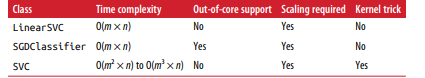

**SVM Regression**

SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances off the street). The width of the street is controlled by a hyperparameter ϵ.
Reducing ϵ increases the number of support vectors which regularizes the model. Moreover if you add more training instances wihin the margin, it will not effect the models predictionsthus the model is said to be ϵ-insensitive.

In [117]:
from sklearn.svm import LinearSVR
svm_reg=LinearSVR(epsilon=0.5,random_state=42)
svm_reg.fit(x,y)

LinearSVR(epsilon=0.5, random_state=42)

In [118]:
from sklearn.svm import SVR
svm_poly_reg=SVR(kernel="poly",degree=2,C=0.01,epsilon=0.1)
svm_poly_reg.fit(x,y)

SVR(C=0.01, degree=2, kernel='poly')

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent
of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when
the training set grows large (just like the SVC class)

##**4.Decision Trees**

 Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are
very powerful algorithms, capable of fitting complex datasets.

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available
today

**Training and Visualizing Decision Tree**

In [119]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris(as_frame=True)
x_iris=iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(x_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

You can visualize the trained decision tree by first using the export_graphviz() function output a graph definition file iris_tree.dot.

In [120]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)","petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

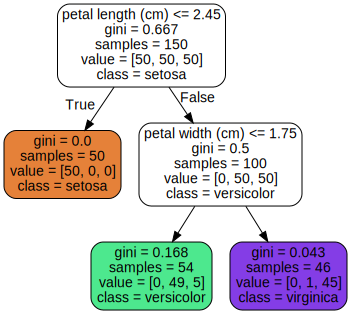

In [121]:
from graphviz import Source
Source.from_file("iris_tree.dot")

**Making Predictions**

Suppose you find
an iris flower and you want to classify it. You start at the root node (depth 0, at the
top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is,
then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf
node (i.e., it does not have any children nodes), so it does not ask any questions: you
can simply look at the predicted class for that node and the Decision Tree predicts
that your flower is an Iris-Setosa (class=setosa).


Now suppose you find another flower, but this time the petal length is greater than
2.45 cm. You must move down to the root’s right child node (depth 1, right), which is
not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If
it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely
an Iris-Virginica (depth 2, right).

A
node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 IrisVersicolor, and 45 Iris-Virginica. Finally, a node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class.

Gini Impurity:
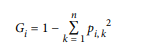

In this equation:

> Gi is the Gini impurity of the ith node.
> pi,k is the ratio of class k instance among the training instances in the ith node.

Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two children.


**Estimating Class Probabilities**

A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node.

In [122]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [123]:
tree_clf.predict([[5,1.5]])

array([1])

**The CART Training Algorithm**

 Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk
 (e.g., “petal length ≤ 2.45 cm”).

 How does it choose k and tk?

  It searches for the
pair (k, tk) that produces the purest subsets (weighted by their size).

CART cost function:

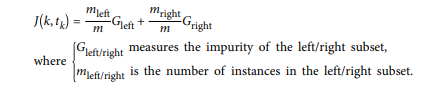

Once it has successfully split the training set in two, it splits the subsets using the
same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity. A few other hyperparameters (described in a
moment) control additional stopping conditions (min_samples_split, min_sam
ples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

**Computational Complexity**

Making predictions requires traversing the Decision Tree from the root to a leaf.
Decision Trees are generally approximately balanced, so traversing the Decision Tree
requires going through roughly O(log2
(m)) nodes.3
 Since each node only requires
checking the value of one feature, the overall prediction complexity is just O(log2
(m)),
independent of the number of features. So predictions are very fast, even when dealing with large training sets.
However, the training algorithm compares all features (or less if max_features is set)
on all samples at each node. This results in a training complexity of O(n × m log(m)).
For small training sets (less than a few thousand instances), Scikit-Learn can speed up
training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

**Gini Impurity or Entropy**

In Machine Learning, it is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.

So should you use Gini impurity or entropy?

 The truth is, most of the time it does not
make a big difference: they lead to similar trees. Gini impurity is slightly faster to
compute, so it is a good default. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees.


**Regularization Hyperparameters**

Decision Trees make very few assumptions about the training data (as opposed to linear models, which obviously assume that the data is linear, for example). If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree: min_samples_split (the minimum number of samples a node must have before it can be split), min_samples_leaf (the minimum number of samples a leaf node must have), min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (maximum number of leaf nodes), and max_features
(maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.

Lets test regularization on the moons dataset.

In [124]:
from sklearn.datasets import make_moons
x_moons,y_moons=make_moons(n_samples=150,noise=0.2,random_state=42)

tree_clf1=DecisionTreeClassifier(random_state=42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(x_moons,y_moons)
tree_clf2.fit(x_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [125]:
x_moons_test,y_moons_test=make_moons(n_samples=1000,noise=0.2,random_state=42)
tree_clf1.score(x_moons_test,y_moons_test)

0.901

In [126]:
tree_clf2.score(x_moons_test,y_moons_test)

0.918

**Decision Tree Regressor**

Decision Trees are also capable of performing regression tasks. Let’s build a regression tree using Scikit-Learn’s DecisionTreeRegressor class, training it on a noisy
quadratic dataset with max_depth=2:

In [127]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
x_quad=np.random.rand(200,1)-0.5
y_quad=x_quad**2 + 0.025*np.random.randn(200,1)

tree_reg=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(x_quad,y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the
training set in a way that minimizes the MSE.



**Decision Trees Have a High Variance**

The main issue with decision trees is that they have quite a high variance: small changes to the hyperparameters or to the data may produce very different models.In fact, since the training algorithm used by Scikit-Learn is stochastic-it randomly selects the set of features to evaluate at each node-even retraining the same decision tree on the exact same data may produce a very different model.

Luckily by averaging predictions over many trees,its possible to reduce variance significantly. Such an ensemble of trees is caled a random forest,and its one of the most powerful types of models available today.

##**5.Ensemble Learning and Random Forests**

If you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

For example, you can train a group of Decision Tree classifiers, each on a different
random subset of the training set. To make predictions, you just obtain the predictions of all individual trees, then predict the class that gets the most vote is the ensemble prediction. Such an ensemble of decision trees is called random forest, and despite its simplicity this is one of the most powerful machine learning algorithms available today.

**Voting Classifiers**

A very simple way to create an even better classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.

Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the
best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a
strong learner (achieving high accuracy), provided there are a sufficient number of
weak learners and they are sufficiently diverse.

suppose you build an ensemble containing 1,000 classifiers that are individually correct only 51% of the time (barely better than random guessing). If you predict the majority voted class, you can hope for up to 75% accuracy! However, this is
only true if all classifiers are perfectly independent, making uncorrelated errors,
which is clearly not the case since they are trained on the same data. They are likely to
make the same types of errors, so there will be many majority votes for the wrong
class, reducing the ensemble’s accuracy.

Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers
is to train them using very different algorithms. This increases the
chance that they will make very different types of errors, improving
the ensemble’s accuracy.

Scikit-Learn provides a VotingClassifier class that's quite easy to use: just give it a list of name/predictor pairs, and use it like a normal classifier.

In [128]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x,y=make_moons(n_samples=500,noise=0.30,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

voting_clf=VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)
voting_clf.fit(x_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

When you fit a VotingClassifier,it clones every estimator and fits the clones.The original estimators are available via the estimators attribute, while the fitted clones are available via the estimators_attribute.If you prefer a dict rather than a list you can use named_estimators_ instead.

In [129]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,"=",clf.score(x_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


When you call the voting classifiers predict() method it performs hard voting. For example the voting classifier predicts class 1 for the first instance of the test set, because two out of three classifiers predict that class:

In [130]:
voting_clf.predict(x_test[:1])

array([1])

In [131]:
[clf.predict(x_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [132]:
voting_clf.score(x_test,y_test)

0.912

If all classifiers are able to estimate class probabilities (i.e., they have a pre
dict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called soft
voting. It often achieves higher performance than hard voting because it gives more
weight to highly confident votes. All you need to do is replace voting="hard" with
voting="soft" and ensure that all classifiers can estimate class probabilities. This is
not the case of the SVC class by default, so you need to set its probability hyperparameter to True (this will make the SVC class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method).

In [133]:
voting_clf.voting="soft"
voting_clf.named_estimators["svc"].probability=True
voting_clf.fit(x_train,y_train)
voting_clf.score(x_test,y_test)

0.92

**Bagging and Pasting**

Another approach is to use the same training algorithm for every
predictor, but to train them on different random subsets of the training set. When
sampling is performed with replacement, this method is called bagging.

When sampling is performed without replacement it is called pasting.

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be
sampled several times for the same predictor.

Once all predictors are trained, the ensemble can make a prediction for a new
instance by simply aggregating the predictions of all predictors. The aggregation
function is typically the statistical mode (i.e., the most frequent prediction, just like a
hard voting classifier) for classification, or the average for regression. Each individual predictor has a higher bias than if it were trained on the original training set, but
aggregation reduces both bias and variance.
 Generally, the net result is that the
ensemble has a similar bias but a lower variance than a single predictor trained on the
original training set.

Predictions can be made in parallel this is one of the reasons bagging and pasting are such popular methods:they scale very well.

Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
sifier class (or BaggingRegressor for regression). The following code trains an
ensemble of 500 Decision Tree classifiers,5
each trained on 100 training instances randomly sampled from the training set with replacement (this is an example of bagging,
but if you want to use pasting instead, just set bootstrap=False). The n_jobs parameter tells Scikit-Learn the number of CPU cores to use for training and predictions
(–1 tells Scikit-Learn to use all available cores)

In [134]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,random_state=42)
bag_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

The BaggingClassifier automatically performs soft voting
instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a predict_proba() method), which is the case
with Decision Trees classifiers.

the ensemble’s predictions will likely
generalize much better than the single Decision Tree’s predictions: the ensemble has a
comparable bias but a smaller variance (it makes roughly the same number of errors
on the training set, but the decision boundary is less irregular).

Bagging introduces a bit more diversity in the subsets that each predictor is
trained on, so bagging ends up with a slightly higher bias than pasting, but this also
means that predictors end up being less correlated so the ensemble’s variance is
reduced. Overall, bagging often results in better models, which explains why it is gen‐
erally preferred. However, if you have spare time and CPU power you can use crossvalidation to evaluate both bagging and pasting and select the one that works best.

**Out of Bag Evaluation**

With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.6
 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
for all predictors.
Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.
In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to
request an automatic oob evaluation after training.

In [135]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,oob_score=True,n_jobs=-1,random_state=42)
bag_clf.fit(x_train,y_train)
bag_clf.oob_score_

0.896

In [136]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.92

The oob decision function for each training instance is also available through the
oob_decision_function_ variable. In this case (since the base estimator has a pre
dict_proba() method) the decision function returns the class probabilities for each
training instance. For example, the oob evaluation estimates that the first training
instance has a 68.25% probability of belonging to the positive class (and 31.75% of
belonging to the negative class).

In [137]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

**Random Patches and Random Subspaces**

The BaggingClassifier class supports sampling the features as well. This is controlled by two hyperparameters: max_features and bootstrap_features. They work
the same way as max_samples and bootstrap, but for feature sampling instead of
instance sampling. Thus, each predictor will be trained on a random subset of the
input features.
This is particularly useful when you are dealing with high-dimensional inputs (such
as images). Sampling both training instances and features is called the Random
Patches method.
7
 Keeping all training instances (i.e., bootstrap=False and max_sam
ples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_fea
tures smaller than 1.0) is called the Random Subspaces method.
Sampling features results in even more predictor diversity, trading a bit more bias for
a lower variance.

**Random Forests**

 you can  use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10 (similarly, there is
a RandomForestRegressor class for regression tasks). The following code trains a
Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using
all available CPU cores

In [138]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(x_train,y_train)
y_pred_rf=rnd_clf.predict(x_test)

With a few exceptions, a RandomForestClassifier has all the hyperparameters of a
DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

**Extra Trees**

It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds (like regular Decision Trees do).

A forest of such extremely random trees is simply called an Extremely Randomized
Trees ensemble (or Extra-Trees for short). Once again, this trades more bias for a
lower variance. It also makes Extra-Trees much faster to train than regular Random
Forests since finding the best possible threshold for each feature at every node is one
of the most time-consuming tasks of growing a tree.

**Feature Importance**

Yet another great quality of Random Forests is that they make it easy to measure the
relative importance of each feature. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it.

Scikit-Learn computes this score automatically for each feature after training, then it
scales the results so that the sum of all importances is equal to 1. You can access the
result using the feature_importances_ variable.

In [139]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
rnd_clf=RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(iris.data,iris.target)
for score,name in zip(rnd_clf.feature_importances_,iris.data.columns):
  print(round(score,2),name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


**Boosting**

Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to train predictors sequentially, each trying to correct its predecessor.

**AdaBoost**

One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.

For example, to build an AdaBoost classifier, a first base classifier (such as a Decision
Tree) is trained and used to make predictions on the training set. The relative weight
of misclassified training instances is then increased. A second classifier is trained
using the updated weights and again it makes predictions on the training set, weights
are updated, and so on.

The first classifier gets many instances wrong, so their weights get boosted. The second classifier therefore does a better job on these instances, and
so on.

Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their
overall accuracy on the weighted training set.

There is one important drawback to this sequential learning technique: it cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been
trained and evaluated. As a result, it does not scale as well as bagging or pasting.

In [140]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30,learning_rate=0.5,random_state=42)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

**Gradient Boosting**

Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.

In [141]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
x=np.random.rand(100,1)-0.5
y=3*x[:,0]**2+0.05*np.random.randn(100) ##y=3x^2+Gaussian Noise

tree_reg1=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(x,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Next we will train a second DecisionTreeRegressor on the residual errors made by first predictor

In [142]:
y2=y-tree_reg1.predict(x)
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=43)
tree_reg2.fit(x,y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

And then we will train a third regressor on the residual errors made by second predictor

In [143]:
y3=y2-tree_reg2.predict(x)
tree_reg3=DecisionTreeRegressor(max_depth=2,random_state=44)
tree_reg3.fit(x,y3)


DecisionTreeRegressor(max_depth=2, random_state=44)

Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all trees.

In [144]:
x_new=np.array([[-0.4],[0.],[0.5]])
sum(tree.predict(x_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

 In the first row, the ensemble has just one
tree, so its predictions are exactly the same as the first tree’s predictions. In the second
row, a new tree is trained on the residual errors of the first tree.Similarly, in the third row another tree is trained on the residual errors of
the second tree.

A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRe
gressor class. Much like the RandomForestRegressor class, it has hyperparameters to
control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on),
as well as hyperparameters to control the ensemble training, such as the number of
trees (n_estimators).

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0,random_state=42)
gbrt.fit(x,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

The learning_rate hyperparameter scales the contribution of each tree. If you set it
to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called shrinkage.

To find the optimal number of treees you colud perform cross validation using GridSearchCV or RandomizedSearchCV as usual but theres a simpler way: if you set the n_iter_no_change hyperparameter to an integer value, say 10 then the GradientBoostingRegressor will automatically stop adding more trees during training if it sees that the last 10 trees didn't help. This is simply early stopping but with a little bit of patience it tolerates having no progress for a few iterations before it stops.Let's train the ensemble using early stopping.

In [146]:
gbrt_best=GradientBoostingRegressor(
    max_depth=2,learning_rate=0.05,n_estimators=500,
    n_iter_no_change=10,random_state=42)
gbrt_best.fit(x,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

If yo set n_iter_no_change too low,training may stop too early and the model will underfit.But if you set it too high it will overfit instead.We also fit a fairly small learning rate and a high number of estimators but the actual number of estimators in the trained ensemble is much lower,thanks to early stopping.

In [147]:
gbrt_best.n_estimators_

92

When n_iter_no_change is set the fit() method automatically splits the training set into a smaller training set and a validation set: this allows it to ecvaluate the models performance each time it adds a new tree. the size of the validation set is controlled by the valiudation_fraction hyperparameter which is 10% by default. The tol hyperparameter determines the maximum performance improvement that still counts as negligible it defaults to 0.0001.

This technique trades a higher bias for lower variance.It also speeds up training considerably.This is called stochastic gradient boosting.

**Histogram Based Gradient Boosting**

It works by binning the input features,replacing them with integers.The number of bins is controlled by the max_bins hyperparameter which defaults to 255 and cannot be set any higher than this.Binning can greatly reduce the number of possible thresholds that the training algorithm needs to evaluate. Moreover,working with integers makes it possible to use faster and more memory-efficient data structures.And the way the bins are built removes the need for sorting the features when training each tree.

As a result this implementation has a computational of O(bxm) instead of O(nxmxlog(m)) where b is the number of bins m is the number of training instances and n is the number of feeatures. In practice this means that HGB can train hundreds of times faster than regular GBRT on large datasets.However binning causes a precision loss,which acts as a regularizer:depending on the datasets,this may help reduce overfitting or it may cause underfitting.

Scikit-Learn provides two classes for HGB: HistGradientBoostingRegressor and HistGradientBoostingClassifer.
They are similar to  GradientBoostingRegressor and GradientBoostingClassifier,with notable differences:

>Early stopping is automatically activated if the number of instances is greater than 10,000.You can turn early stopping always on or always off by setting the early_stopping hyperparameter to True or False.

>Subsampling is not supported.

>n_estimators is renames to max_iter.

>The only decision tree  hyperparameters that can  be tweaked are max_leaf_nodes, min_samples_leaf and max_depth.

**stacking**

It is based on a simple idea: instead of using trivial functions
(such as hard voting) to aggregate the predictions of all predictors in an ensemble,
why don’t we train a model to perform this aggregation?shows such an
ensemble performing a regression task on a new instance. Each of the bottom three
predictors predicts a different value (3.1, 2.7, and 2.9), and then the final predictor
(called a blender, or a meta learner) takes these predictions as inputs and makes the
final prediction (3.0)

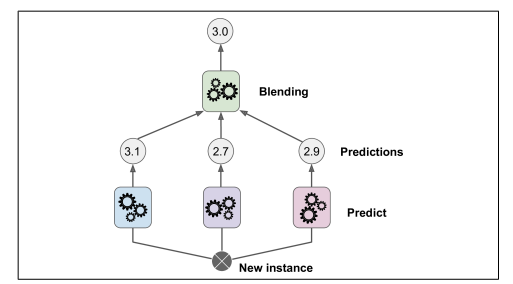

To train the blender you first need to build the blending training set. You can use cross_val_predict() on every predictor in the ensemble to get out of sample predictions for eachinstance in the original training set and can be used as the Input features to train the blender; and the target can be simply copied from original training set.

Regardless of the number of features in the trainig set,the blending trianing set will contain one input feature per predictor.Once the blender is trained the base predictors are retrained one last time on the ful original training set.

Scikit Learn provides two classes for stacking ensembles.StackingClassifier and StackingRegressor.

In [153]:
from sklearn.ensemble import StackingClassifier
stacking=StackingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(probability=True,random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),cv=5
)
stacking.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [154]:
stacking.score(x_test,y_test)

0.928

This is bit better than the voting classifier using soft voting